## Dataset Information

Bike sharing systems are a new version of traditional bike rentals where the whole
process from membership, rental and return back has been automated. Through these
systems, users are easily able to rent a bike from a particular position and return back
at another position. Currently, there are about over 500 bike-sharing programs around
the world which is composed of over 500 thousands bicycles. Today, there exists great
interest in these systems due to their important role in traffic, environmental and health
issues. 

Apart from interesting real world applications of bike sharing systems, the
characteristics of data being generated by these systems make them attractive for
research. Opposed to other transport services such as bus or subway, the duration of
travel, departure and arrival position is explicitly recorded in these systems. This feature
turns the bike sharing system into a virtual sensor network that can be used for sensing
mobility in the city. Hence, it is expected that most of the important events in the city
could be detected via monitoring these data.

## Objective

- To select the suitable Regression algorithm for the bike sharing count and using it to predict the bike sharing count.
- Identification of most promising attributes for the regression.

### Attribute Information

Both the files hour.csv and day.csv have the following fields, except hr which is not
available in day.csv
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if neither weekend nor holiday, it is 1; otherwise 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-
t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-
t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered.

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('Hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [4]:
df.cnt.value_counts()

cnt
5      260
6      236
4      231
3      224
2      208
      ... 
913      1
847      1
777      1
661      1
636      1
Name: count, Length: 869, dtype: int64

In [5]:
## Statistical information
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Descriptive Analysis

Here initially we load the csv file and divide the attributes based on their feature such as categorical attributes and integer attributes.

This spitting will further be helpful for testing and training.

Later we find all the statistical information for each integer column.

Later for each column of the categorical attributes we find the variables like the count, unique values, top and the frequency.

In [6]:
## Datatype Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Preprocessing the dataset

Data preprocessing refers to preparing (cleaning and organizing) the raw data to make it suitable for building and 
training Machine Learning models.

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset.

In [8]:
## Dropping unnecessary columns
df = df.drop(columns=['instant','dteday'],axis=1)

In [9]:
df.duplicated().value_counts()

False    17377
True         2
Name: count, dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
corr=df.corr()
corr["hr"].sort_values(ascending=False)

hr            1.000000
cnt           0.394006
registered    0.374075
casual        0.301149
temp          0.137612
windspeed     0.137180
atemp         0.133754
workingday    0.002260
holiday       0.000460
weekday      -0.003461
yr           -0.003851
mnth         -0.005691
season       -0.006027
weathersit   -0.020277
hum          -0.276450
Name: hr, dtype: float64

### Exploratory Data Analysis (EDA)

##### We will analyze the data using visual techniques in terms of time and other attributes.

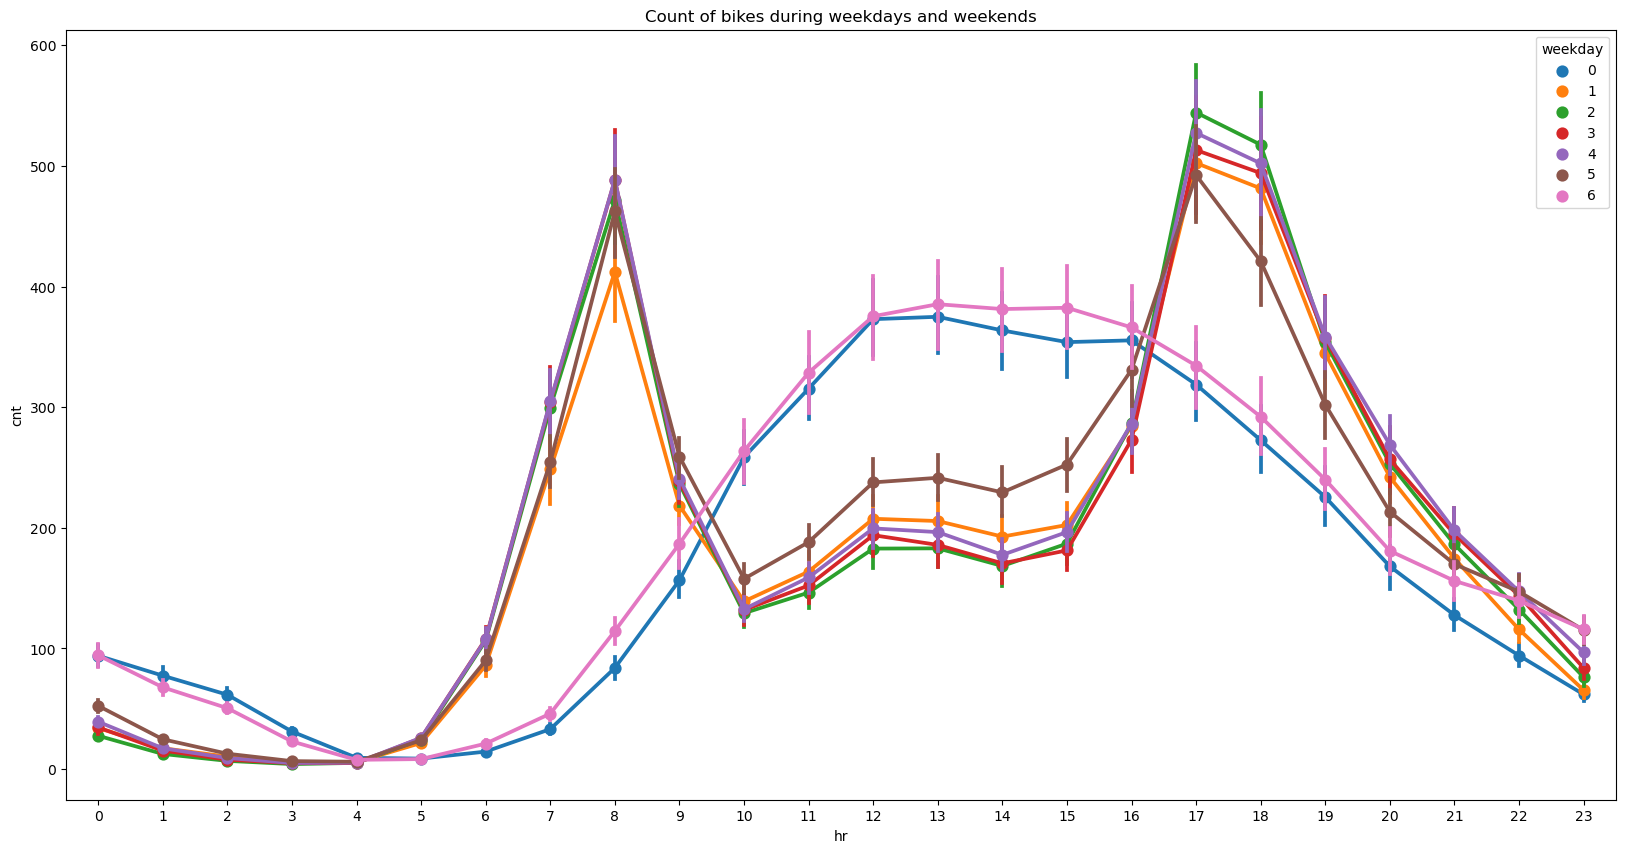

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data =df,x='hr',y='cnt',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')
plt.show()

#### Inferences

- The X-axis is the hour and Y-axis is the count of the bike.
- On weekdays, we observe a peak in the morning hours and in the evening.
- On weekends, the peak value is in the afternoon.

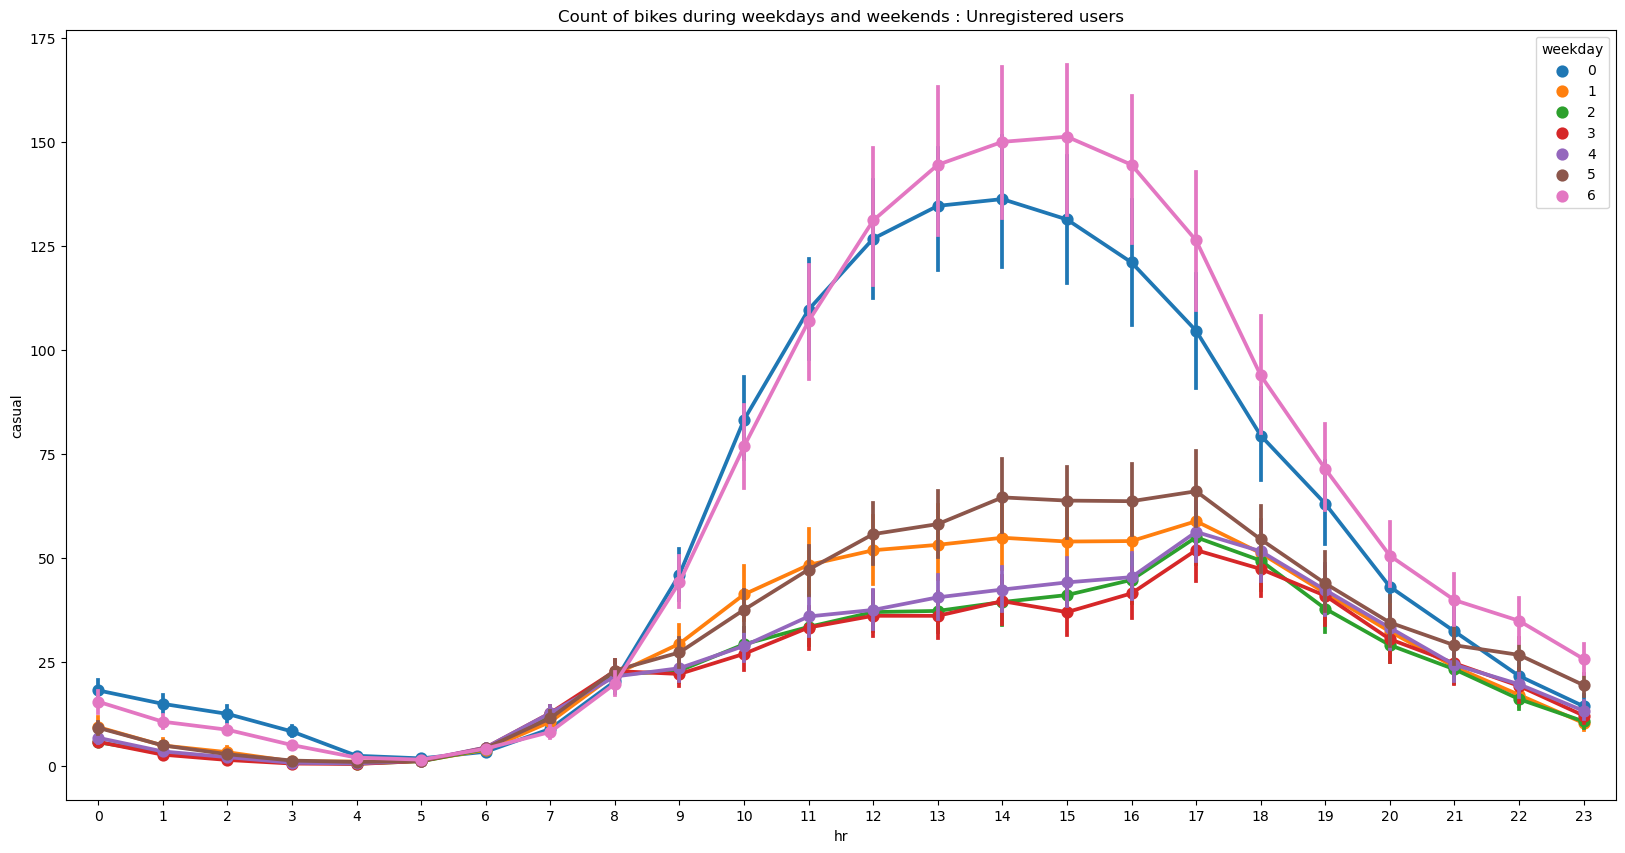

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data =df,x='hr',y='casual',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends : Unregistered users')
plt.show()

#### Inferences

- The graph shows the count of unregistered users throughout the week.
- We observe the high count on weekends.
- This data can be related to weekend outdoor activities.

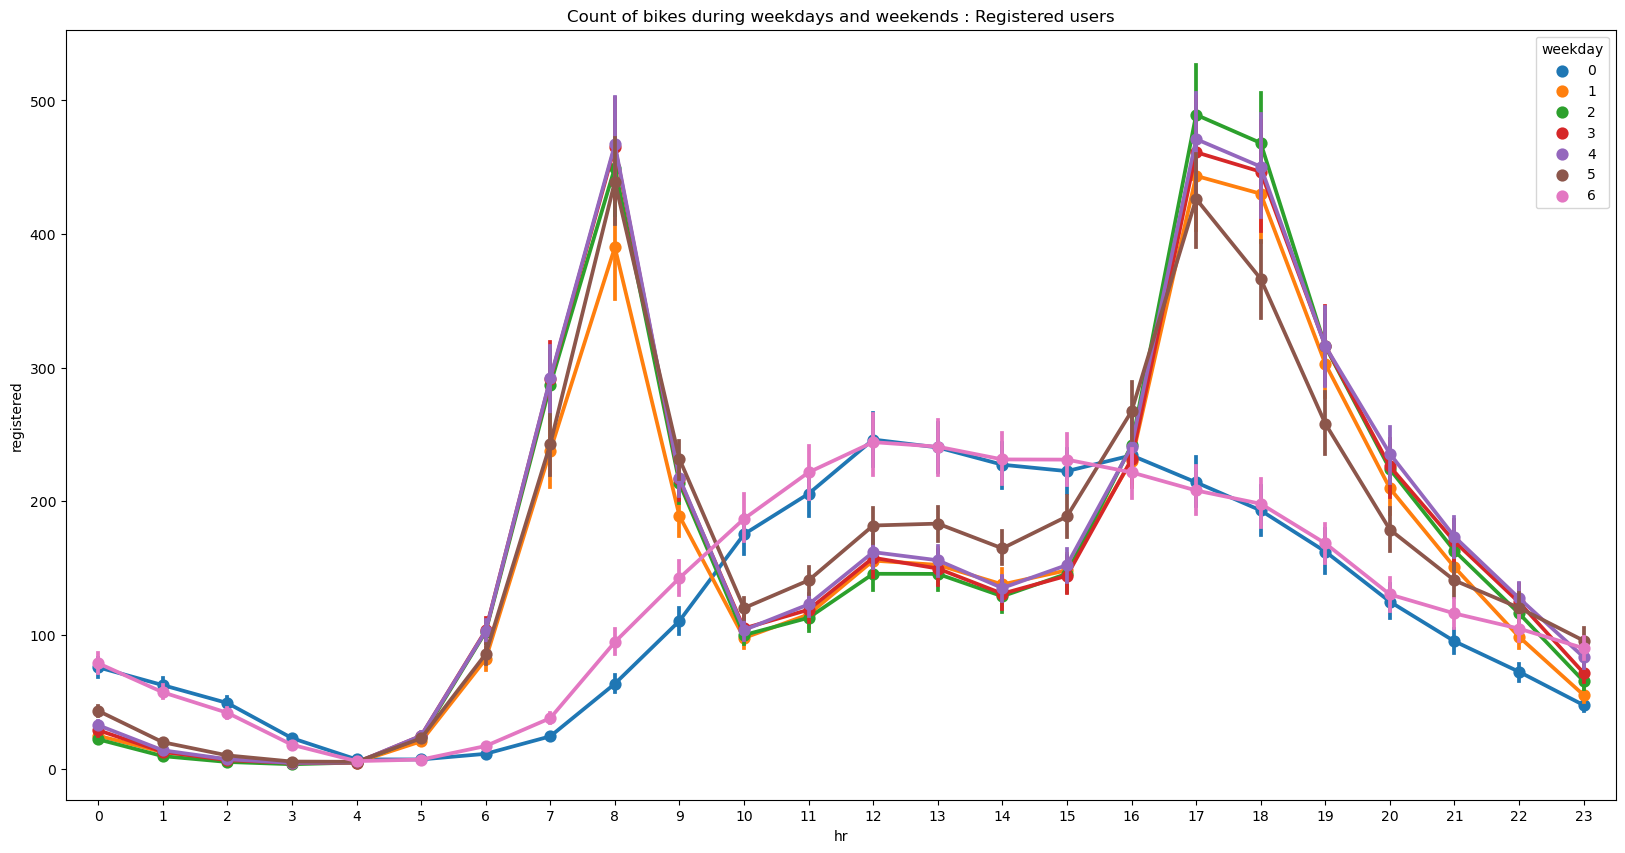

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data =df,x='hr',y='registered',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends : Registered users')
plt.show()

#### Inferences

- The graph shows the count of registered users throughout the week.
- This data can be related to the working personnel.
- For the weekends they not using that much compared to the above graph ( Unregistered users)

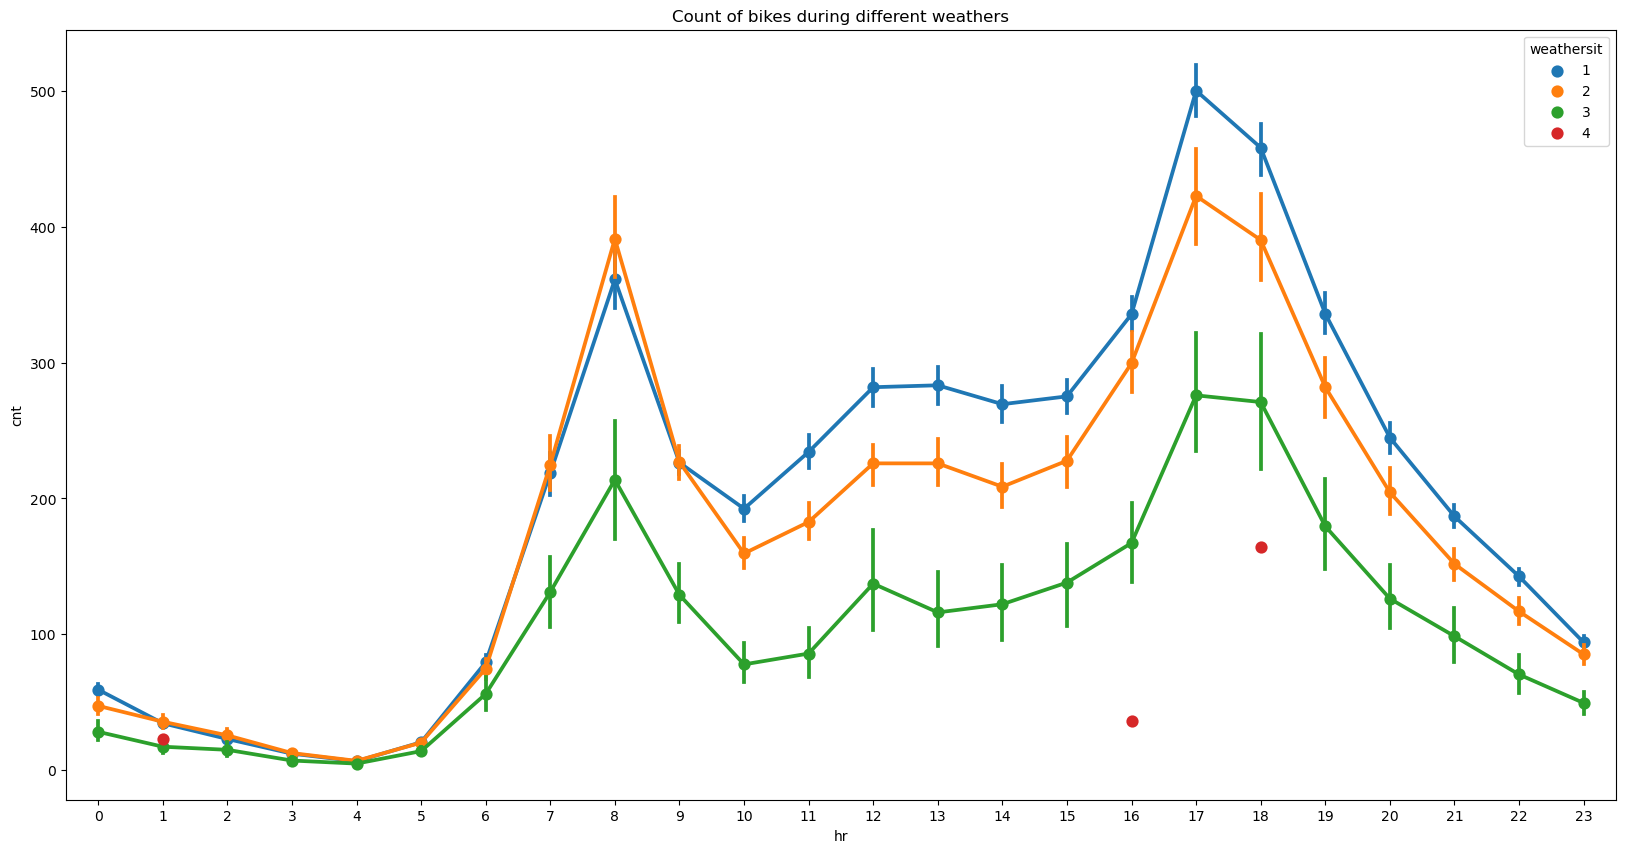

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data =df,x='hr',y='cnt',hue='weathersit',ax=ax)
ax.set(title='Count of bikes during different weathers')
plt.show()

#### Inferences

- The graph is similar to the previous graphs except for the weather 4.
- Weather 4 with the color red must indicate Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog,
  where no users book the bike.

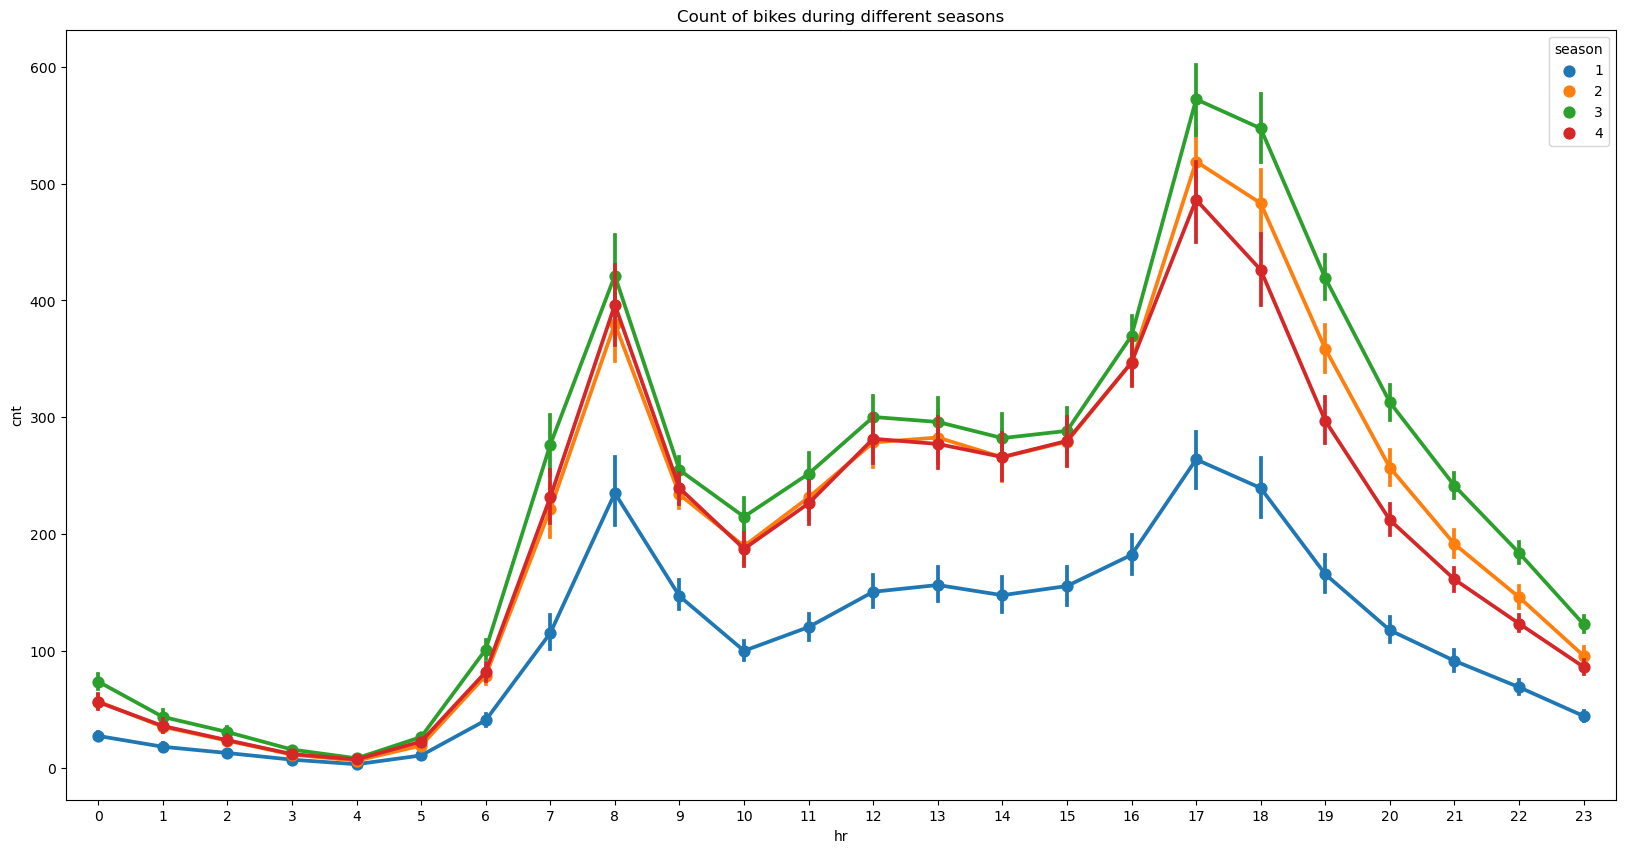

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data =df,x='hr',y='cnt',hue='season',ax=ax)
ax.set(title='Count of bikes during different seasons')
plt.show()

#### Inferences

- Out of four seasons three seasons those are spring, summer, fall have high number of users and have similar graph.
- Only one season that is in winter have low number of users.

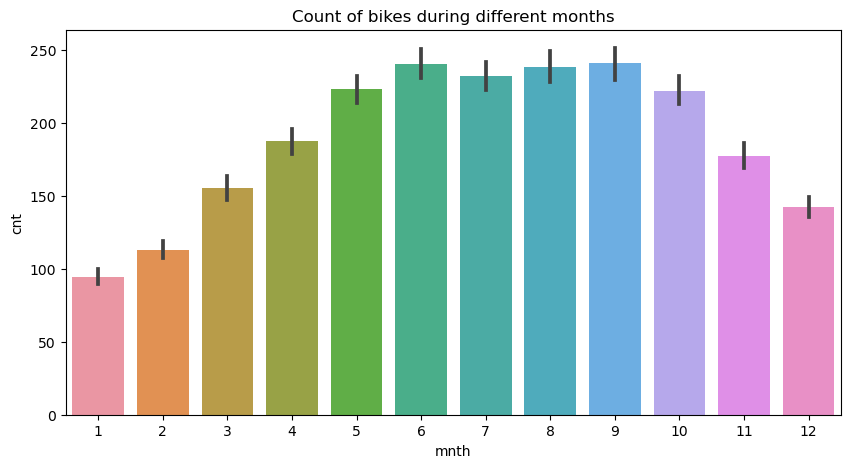

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data =df,x='mnth',y='cnt',ax=ax)
ax.set(title='Count of bikes during different months')
plt.show()

#### Inferences

- We observe that a uniform distribution.
- Over a period of time the number of users are increases and gradually, the number of users decreases.

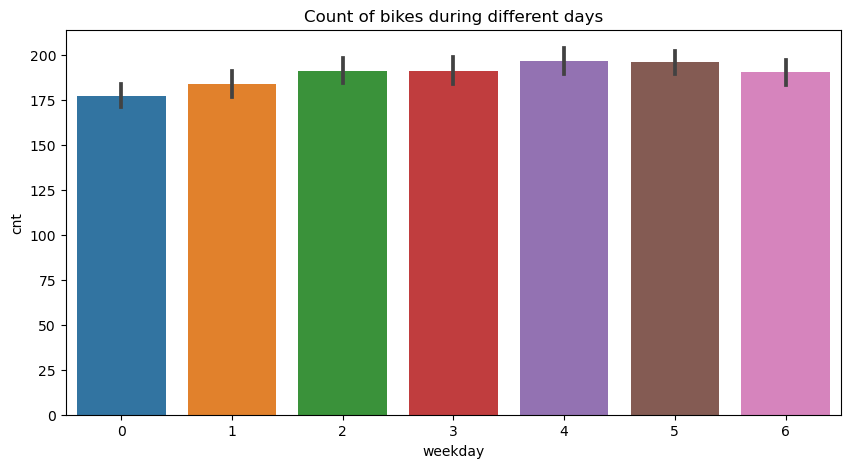

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data =df,x='weekday',y='cnt',ax=ax)
ax.set(title='Count of bikes during different days')
plt.show()

#### Inferences

- In this graph, we observe an average number of users throughout the week.
- Thus, the average distribution is impractical for predictions.
- We observe that all the days we are getting on an average of 175 to 180 number of vehicles.

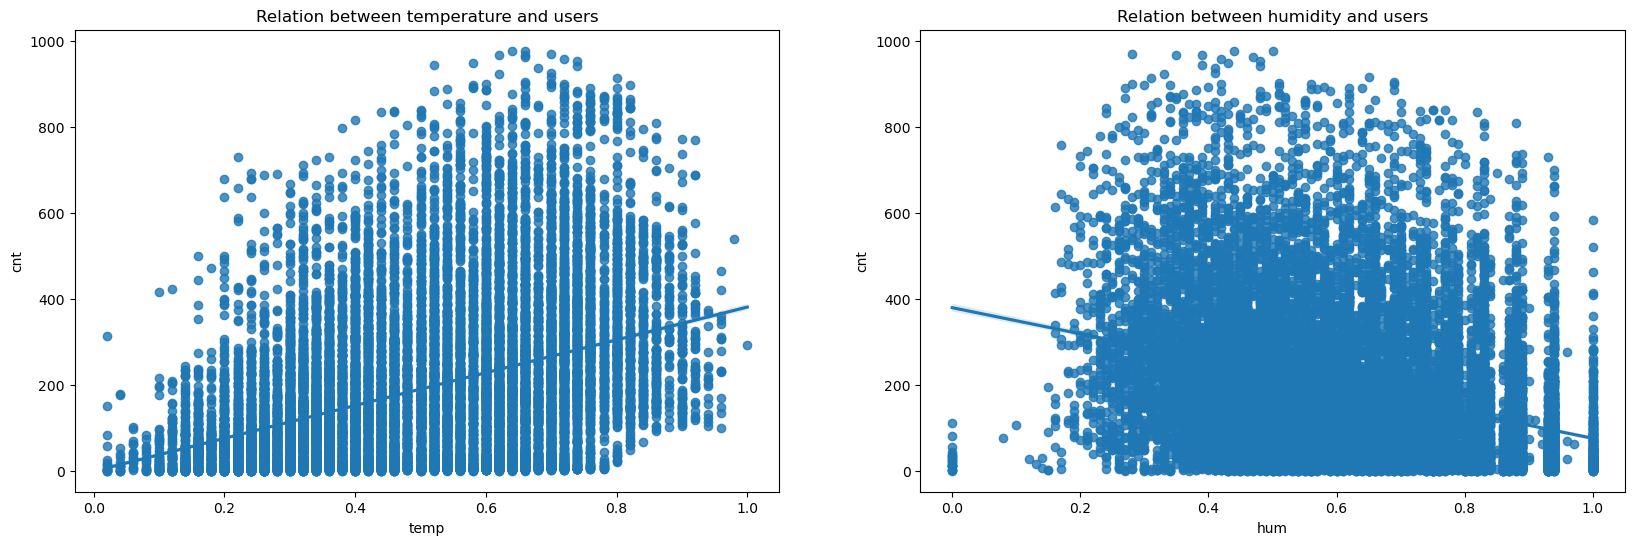

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=df['temp'],y=df['cnt'],ax=ax1)
ax1.set(title = 'Relation between temperature and users')
sns.regplot(x=df['hum'],y=df['cnt'],ax=ax2)
ax2.set(title='Relation between humidity and users')
plt.show()

- With the increase in temperature, the number of user increases.
- When the humidity increases the number of users decreases.


## Normality Test

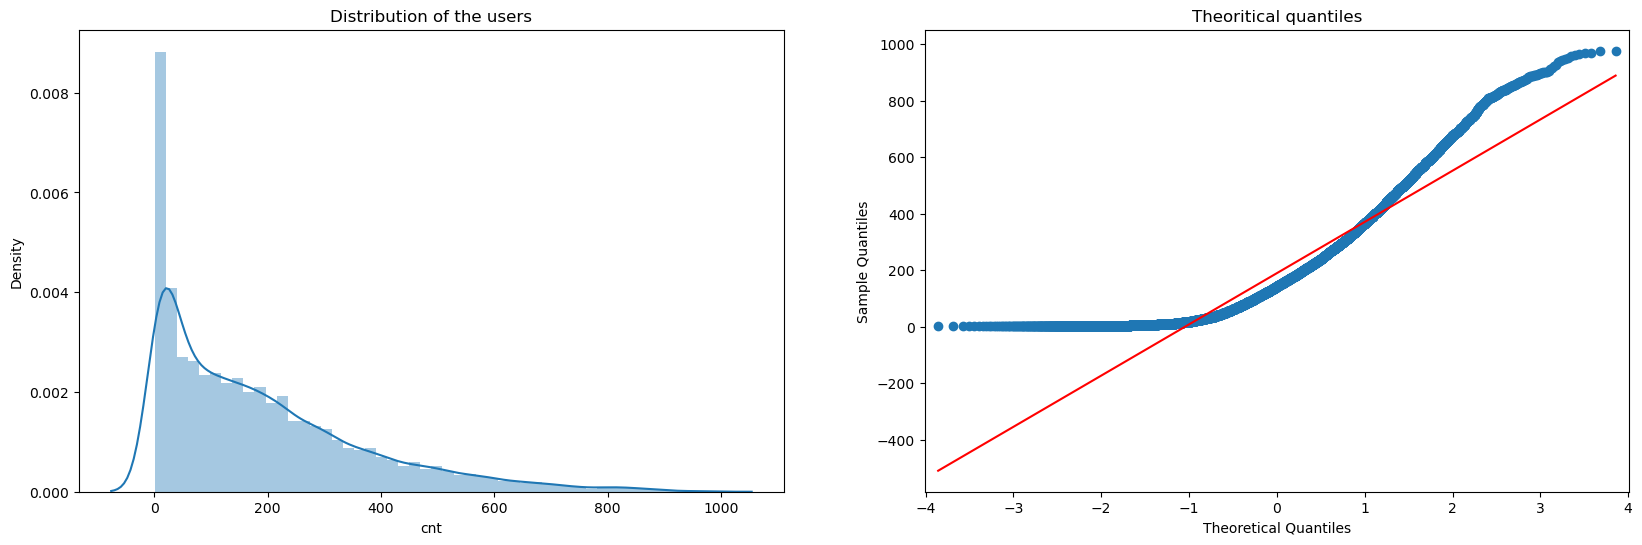

In [20]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(df['cnt'],ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['cnt'],ax=ax2,line='s')
ax2.set(title='Theoritical quantiles')
plt.show()

- We can see a huge numerical difference in the distribution of the users, so the data is not equally distributed, it is right skewed
- Most of the data are in zero in the theoretical quantiles, so we must convert the data to approximate as much as possible as the red line

##### Now we will apply log transformation to uniform the data

In [21]:
df['cnt'] = np.log(df['cnt'])

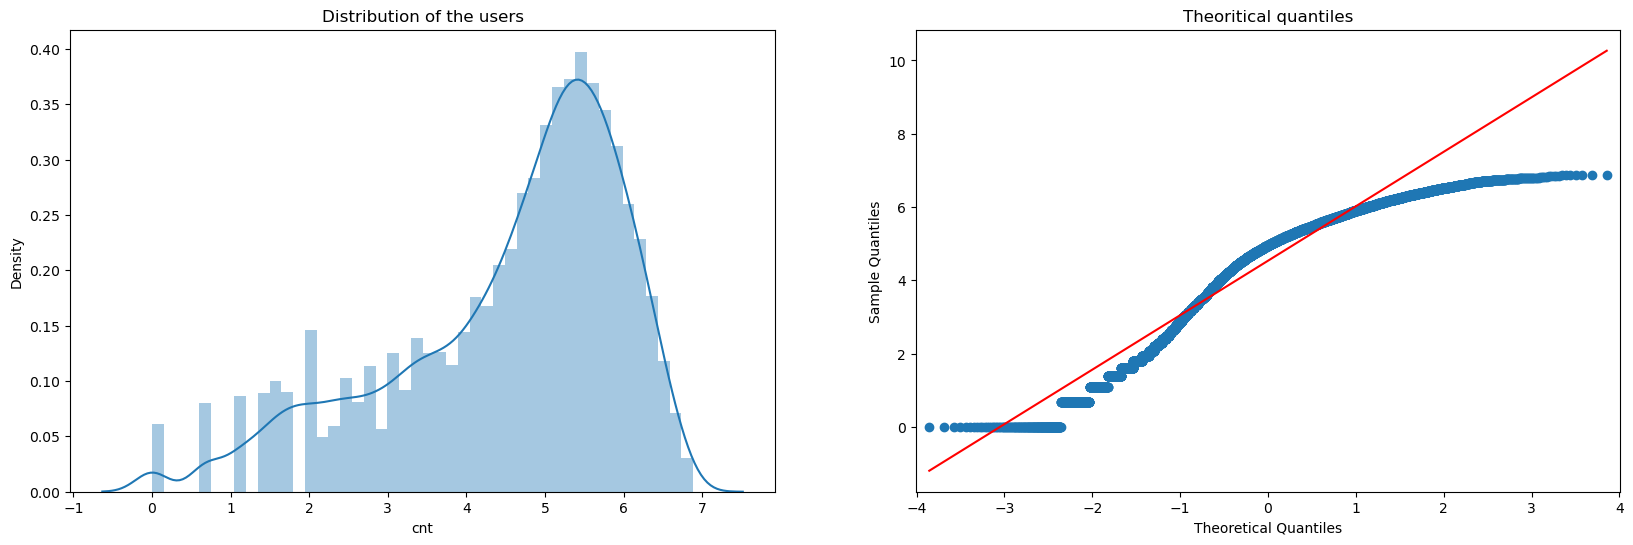

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(df['cnt'],ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['cnt'],ax=ax2,line='s')
ax2.set(title='Theoritical quantiles')
plt.show()

- Now the distribution is more uniform, meaning the data was converted accordingly.
- Now the data in the theoretical quantiles is very similar to the red line.
- we may use MIN-MAX normalization or Standardization to see different results.

### Correlation Matrix

<Axes: >

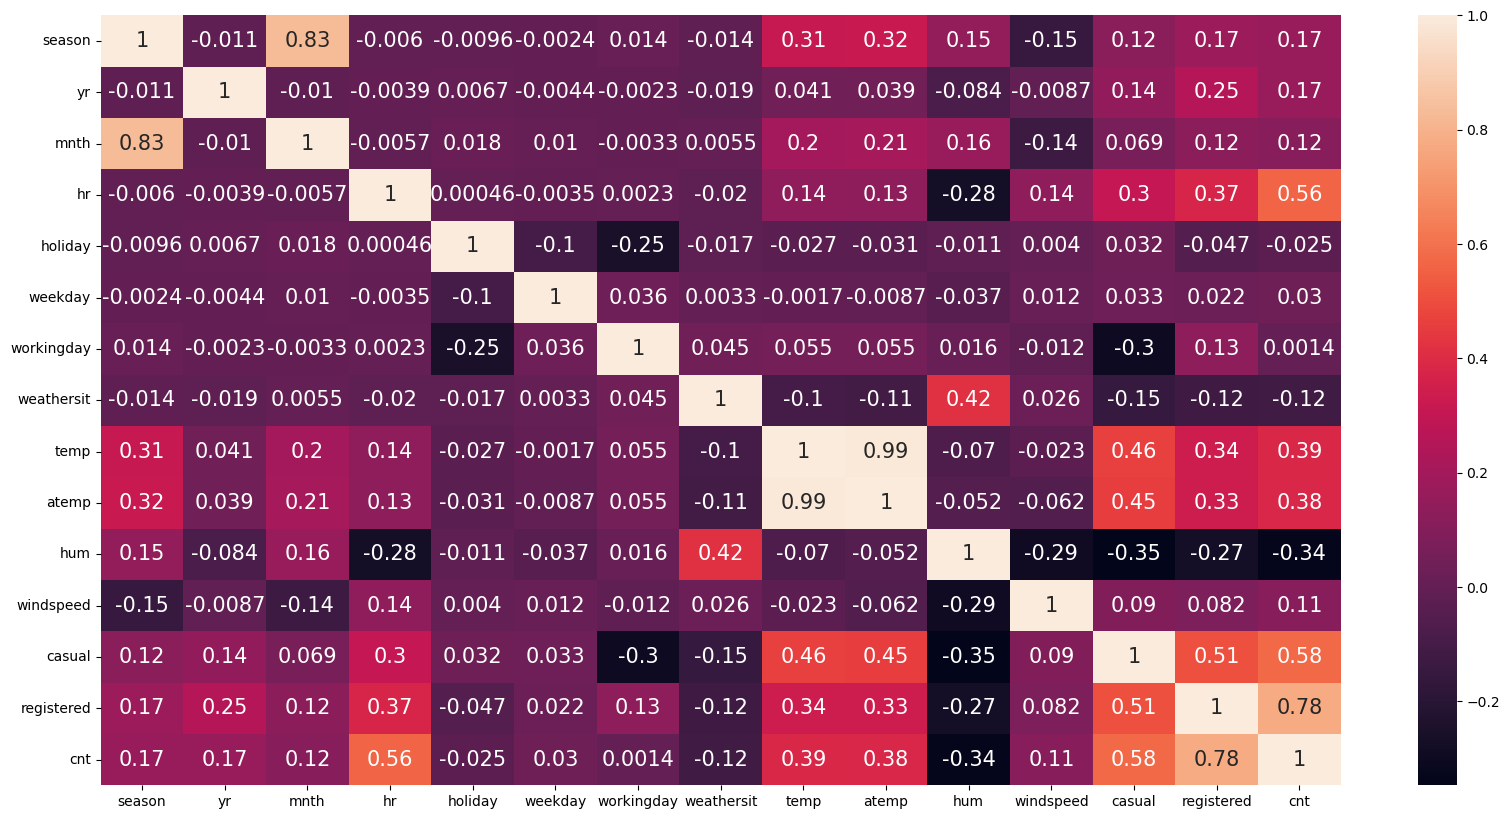

In [23]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, annot_kws={'size':15})

#### Inferences

- We use the correlation matrix for numerical data.
- We observe a highly positive correlation between 'temp' and 'atemp' and between 'casual' and 'registered'.
- 'Windspeed' displays an insignificant contribution to the count.
- Hence, we will drop a few unnecessary columns later.


### Outlier Handling

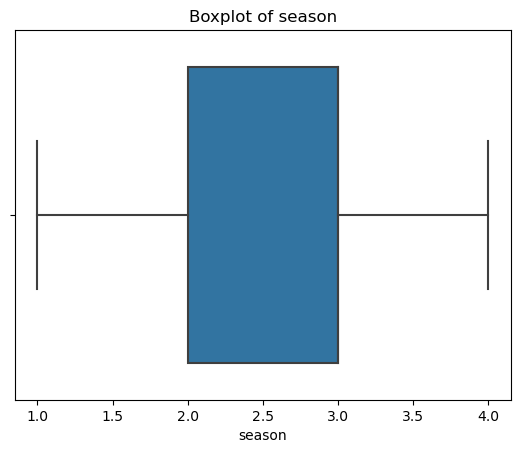

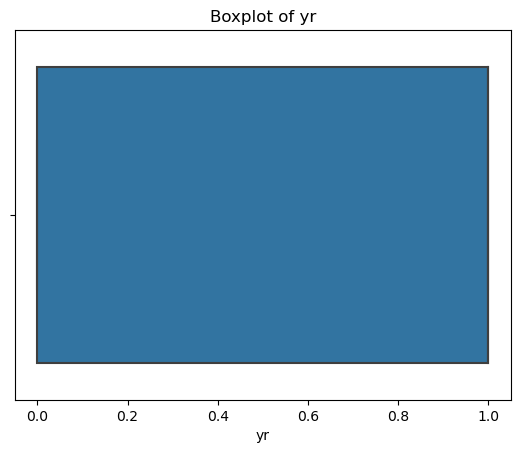

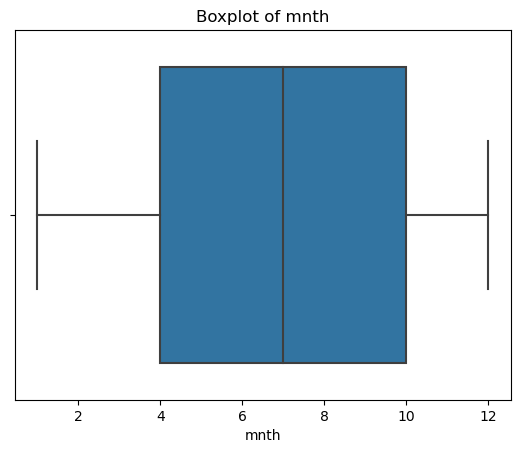

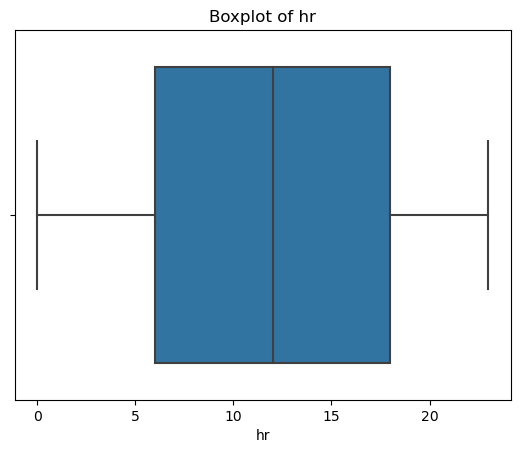

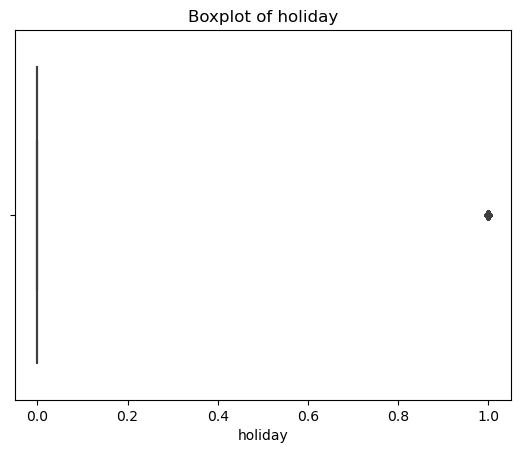

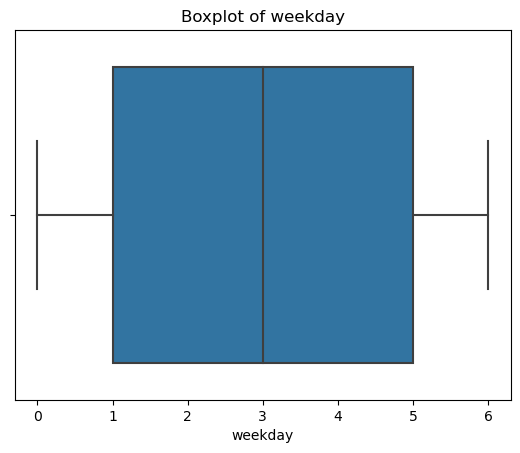

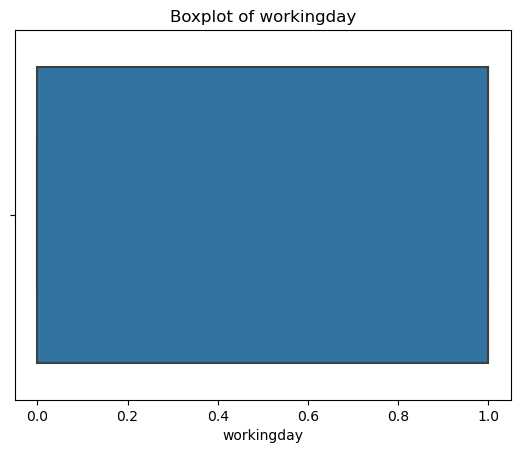

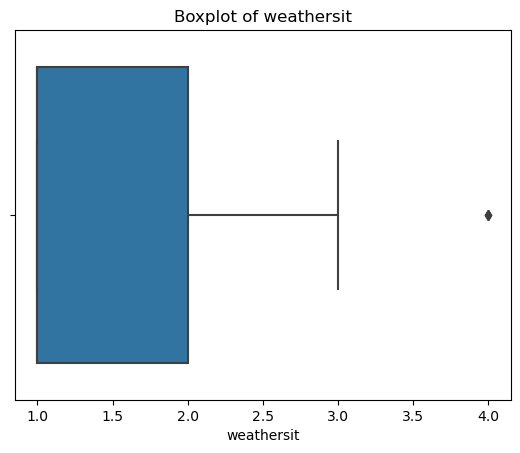

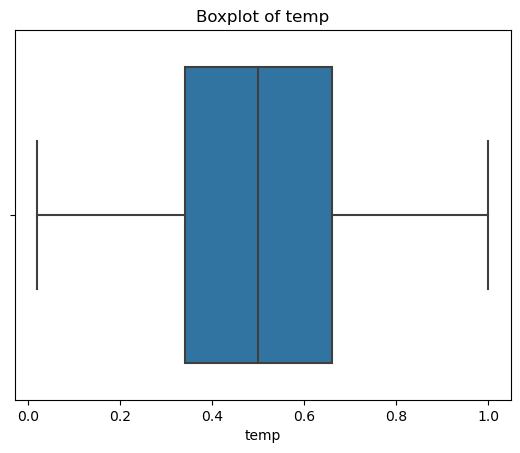

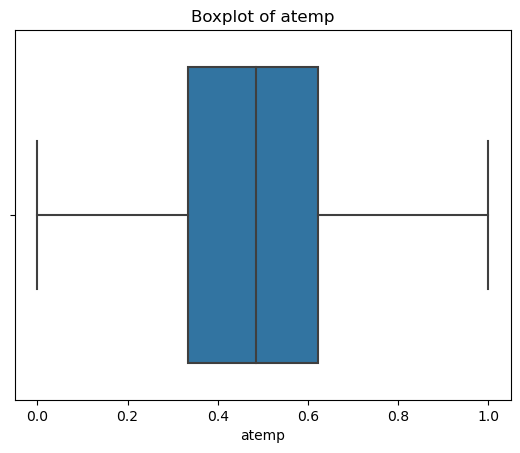

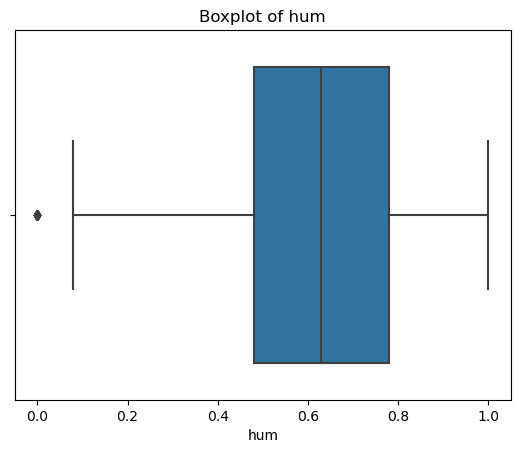

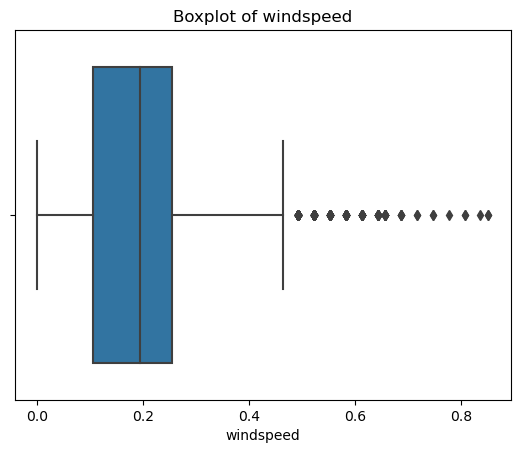

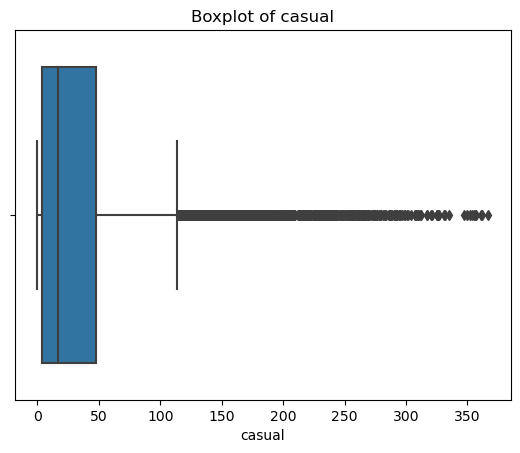

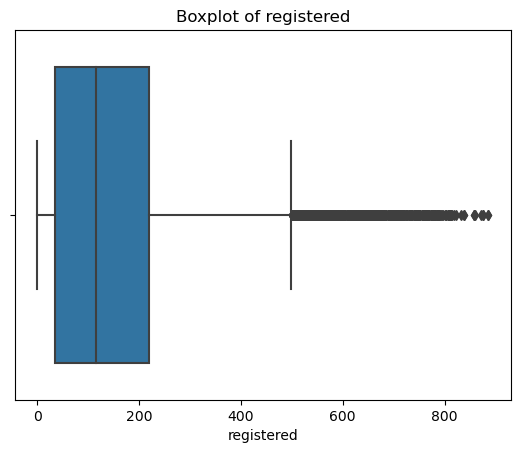

In [24]:
df_column = df.columns[~(df.columns=='cnt')]
for i in df_column:
    sns.boxplot(data=df,x=i)
    plt.title(f"Boxplot of {i}")
    plt.show()

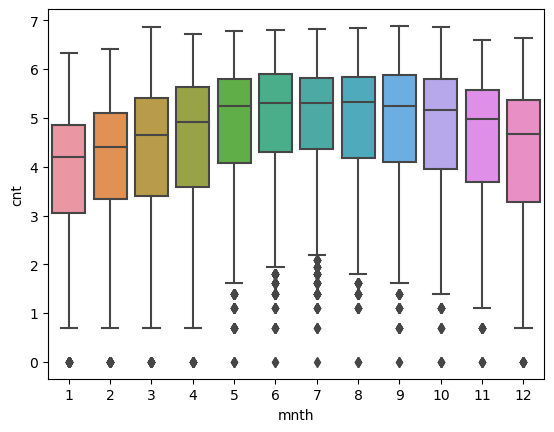

In [25]:
sns.boxplot(data=df,y='cnt',x='mnth',orient='v')
plt.show()

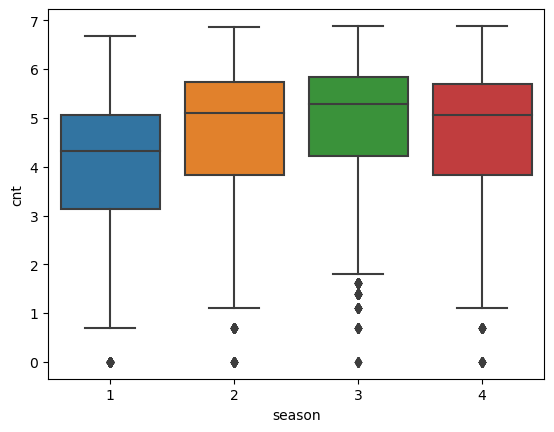

In [26]:
sns.boxplot(data=df,y='cnt',x='season',orient='v')
plt.show()

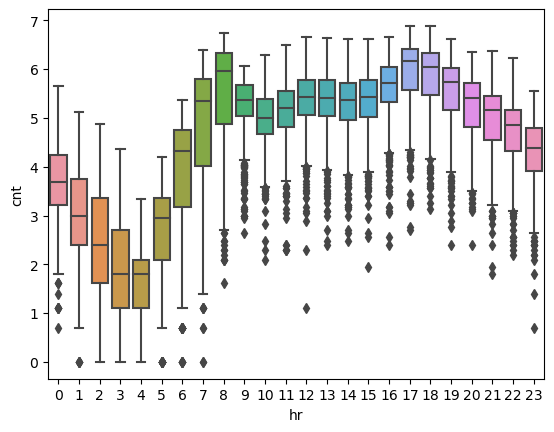

In [27]:
sns.boxplot(data=df,y='cnt',x='hr',orient='v')
plt.show()

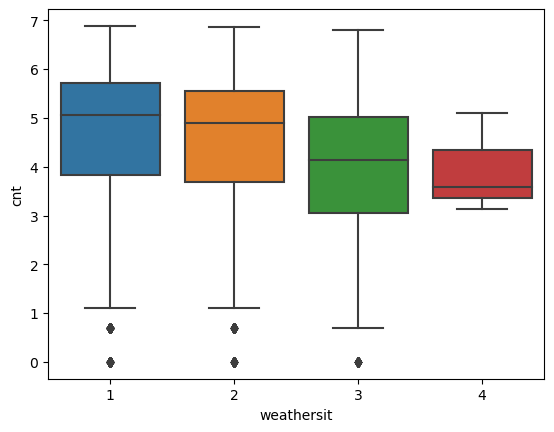

In [28]:
sns.boxplot(data=df,y='cnt',x='weathersit',orient='v')
plt.show()

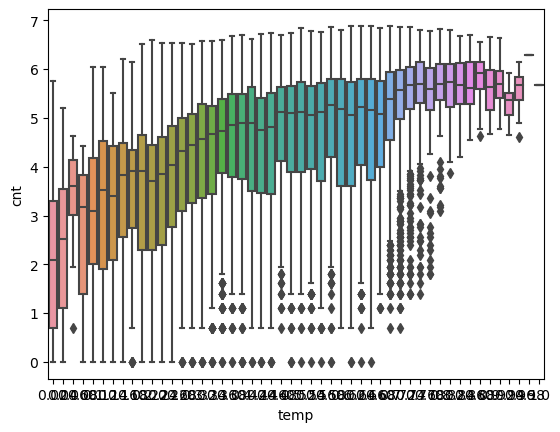

In [29]:
sns.boxplot(data=df,y='cnt',x='temp',orient='v')
plt.show()

In [30]:
from scipy import stats

In [31]:
IQR_win= stats.iqr(df.windspeed)
IQR_win

0.1492

In [32]:
Q1_win = np.percentile(df.windspeed,25)
Q3_win = np.percentile(df.windspeed,75)

In [33]:
LB_win = Q1_win - 1.5*IQR_win
UB_win = Q3_win + 1.5*IQR_win

In [34]:
df.loc[df.windspeed>UB_win,'windspeed']

175      0.4925
178      0.5522
194      0.5224
196      0.5224
265      0.5821
          ...  
17327    0.5522
17328    0.4925
17341    0.5821
17343    0.5821
17344    0.6567
Name: windspeed, Length: 342, dtype: float64

In [35]:
df.loc[df.windspeed<LB_win,'windspeed']

Series([], Name: windspeed, dtype: float64)

In [36]:
df[(df.windspeed<UB_win)&(df.windspeed>LB_win)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,4.779123
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,4.488636
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,4.499810
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,4.110874


In [37]:
((17379-17037)/17379)*100

1.9678922837907822

In [38]:
df.windspeed.median()

0.194

In [39]:
df.loc[df.windspeed>UB_win,'windspeed'] = 0.194

In [40]:
IQR_ca=stats.iqr(df.casual)
IQR_ca

44.0

In [41]:
Q1_ca = np.percentile(df.casual,25)
Q3_ca =np.percentile(df.casual,75)

In [42]:
LB_ca = Q1_ca - 1.5*IQR_ca
UB_ca = Q3_ca +1.5*IQR_ca

In [43]:
df.loc[df.casual>UB_ca,'casual']

1633     144
1634     149
1635     124
1771     126
1772     174
        ... 
16817    122
16818    148
16819    164
16820    167
16821    139
Name: casual, Length: 1192, dtype: int64

In [44]:
df.loc[df.casual<LB_ca,'casual']

Series([], Name: casual, dtype: int64)

In [45]:
df[(df.casual<UB_ca)&(df.casual>LB_ca)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,4.779123
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,4.488636
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,4.499810
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,4.110874


In [46]:
((17379-16170)/17379)*100

6.956671845330571

In [47]:
IQR_re = stats.iqr(df.registered)
IQR_re

186.0

In [48]:
Q1_re = np.percentile(df.registered,25)
Q3_re = np.percentile(df.registered,75)

In [49]:
LB_re = Q1_re - 1.5 *IQR_re
UB_re = Q3_re + 1.5*IQR_re

In [50]:
df.loc[df.registered>UB_re,'registered']

2995     539
3019     532
3067     540
3187     521
3379     524
        ... 
17063    512
17077    665
17086    536
17087    546
17101    585
Name: registered, Length: 680, dtype: int64

In [51]:
df.loc[df.registered<LB_re,'registered']

Series([], Name: registered, dtype: int64)

In [52]:
df[(df.registered<UB_re)&(df.registered>LB_re)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,4.779123
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,4.488636
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,4.499810
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,4.110874


In [53]:
((17379-16696)/17379)*100

3.9300304965763275

In [54]:
df.registered.median()

115.0

In [55]:
df.loc[df.registered>UB_re,'registered']=115.0

In [56]:
## Change int columns to category
cols = ['season','mnth','hr','holiday','weekday','workingday','weathersit']
for i in cols:
    df[i]=df[i].astype('category')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17377 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17377 non-null  category
 1   yr          17377 non-null  int64   
 2   mnth        17377 non-null  category
 3   hr          17377 non-null  category
 4   holiday     17377 non-null  category
 5   weekday     17377 non-null  category
 6   workingday  17377 non-null  category
 7   weathersit  17377 non-null  category
 8   temp        17377 non-null  float64 
 9   atemp       17377 non-null  float64 
 10  hum         17377 non-null  float64 
 11  windspeed   17377 non-null  float64 
 12  casual      17377 non-null  int64   
 13  registered  17377 non-null  int64   
 14  cnt         17377 non-null  float64 
dtypes: category(7), float64(5), int64(3)
memory usage: 1.3 MB


### Encoding

In [58]:
df= pd.get_dummies(df, columns=cols)

In [59]:
df.head()

,yr,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0.24,0.2879,0.81,0.0,3,13,2.772589,True,False,...,False,False,False,True,True,False,True,False,False,False
1,0,0.22,0.2727,0.80,0.0,8,32,3.688879,True,False,...,False,False,False,True,True,False,True,False,False,False
2,0,0.22,0.2727,0.80,0.0,5,27,3.465736,True,False,...,False,False,False,True,True,False,True,False,False,False
3,0,0.24,0.2879,0.75,0.0,3,10,2.564949,True,False,...,False,False,False,True,True,False,True,False,False,False
4,0,0.24,0.2879,0.75,0.0,0,1,0.000000,True,False,...,False,False,False,True,True,False,True,False,False,False


- New data frame after encoding the data, adding new features.
- With the additional features added this will increase the training process time as well as the accuracy.


## Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scale = MinMaxScaler()
df[['temp','atemp','hum','windspeed','casual','registered','cnt']]=scale.fit_transform(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])

In [62]:
df

,yr,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0.224490,0.2879,0.81,0.000000,0.008174,0.026052,0.402730,True,False,...,False,False,False,True,True,False,True,False,False,False
1,0,0.204082,0.2727,0.80,0.000000,0.021798,0.064128,0.535825,True,False,...,False,False,False,True,True,False,True,False,False,False
2,0,0.204082,0.2727,0.80,0.000000,0.013624,0.054108,0.503412,True,False,...,False,False,False,True,True,False,True,False,False,False
3,0,0.224490,0.2879,0.75,0.000000,0.008174,0.020040,0.372569,True,False,...,False,False,False,True,True,False,True,False,False,False
4,0,0.224490,0.2879,0.75,0.000000,0.000000,0.002004,0.000000,True,False,...,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0.244898,0.2576,0.60,0.354874,0.029973,0.216433,0.694187,True,False,...,False,False,False,False,False,True,False,True,False,False
17375,1,0.244898,0.2576,0.60,0.354874,0.021798,0.162325,0.651993,True,False,...,False,False,False,False,False,True,False,True,False,False
17376,1,0.244898,0.2576,0.60,0.354874,0.019074,0.166333,0.653616,True,False,...,False,False,False,False,False,True,True,False,False,False
17377,1,0.244898,0.2727,0.56,0.290253,0.035422,0.096192,0.597121,True,False,...,False,False,False,False,False,True,True,False,False,False


## Split Data

In [63]:
X = df[df.columns.difference(['cnt'])]
y = df['cnt']

## Model Training

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         GradientBoostingRegressor(),
         ExtraTreesRegressor(),
         SVR()]

In [65]:
from sklearn import model_selection

In [66]:
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:' , model)
    print('CV score:', abs(cv_score))

In [67]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.00699113966563929
Model: Ridge()
CV score: 0.006944426774301221
Model: HuberRegressor()
CV score: 0.007748808391559195
Model: ElasticNetCV()
CV score: 0.006918943854350349
Model: DecisionTreeRegressor()
CV score: 0.00015677666463684495
Model: RandomForestRegressor()
CV score: 6.825658313119137e-05
Model: GradientBoostingRegressor()
CV score: 0.0001801601532062753
Model: ExtraTreesRegressor()
CV score: 6.977659664565793e-05
Model: SVR()
CV score: 0.004075503727069719


- Various models were imported to see different results
- These are common models for regression problems.
- Which model has the least CV score that model is better model.
- As seen in above Random Forest Regressor is best model than the other models.
- Now we can train the models who have less CV score.

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Model Evaluation

In [69]:
from sklearn.metrics import r2_score

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Random Forest Regressor 

In [71]:
r_model = RandomForestRegressor()
r_model.fit(X_train,y_train)
r_y_pred = r_model.predict(X_test)

### Error Difference

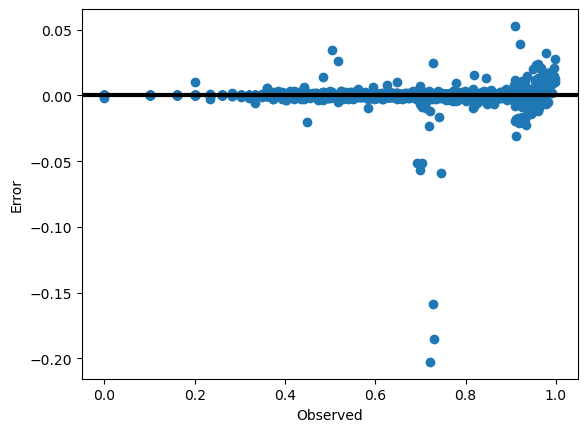

In [72]:
error = y_test - r_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [73]:
mean_squared_error(y_test,r_y_pred)

4.067409672881788e-05

In [74]:
np.sqrt(mean_squared_error(y_test,r_y_pred))

0.006377624693317872

In [75]:
mean_absolute_error(y_test,r_y_pred)

0.0012482832906296401

- Mean squared error from the test data and the predicted data

In [76]:
r2_score(y_test,r_y_pred)

0.9991054160847946

In [77]:
r_model.feature_importances_

array([7.60727137e-05, 1.69126230e-02, 2.71812342e-06, 2.64769229e-06,
       1.41948772e-05, 8.08604043e-07, 7.39083422e-05, 6.22594945e-05,
       6.27300406e-06, 1.79044047e-06, 9.59648590e-05, 1.38998890e-05,
       2.91479693e-07, 7.81615373e-05, 1.61893332e-05, 3.79503282e-05,
       4.11183045e-06, 2.33183490e-06, 2.80083731e-07, 1.23402602e-04,
       3.56018362e-06, 1.25850733e-06, 3.23880164e-07, 1.51625341e-07,
       1.32948942e-05, 6.44531442e-06, 1.26168814e-04, 1.93681254e-05,
       3.66847565e-05, 7.20309032e-06, 1.01457967e-05, 3.23975007e-06,
       2.17933063e-06, 5.89875461e-06, 9.09055632e-06, 7.19020529e-06,
       4.48565963e-06, 4.23682662e-06, 1.56272468e-06, 7.49144054e-06,
       1.44906625e-05, 9.80846647e-01, 1.65827176e-05, 1.40454962e-05,
       4.64457631e-06, 6.22236470e-06, 6.37652250e-05, 5.91552159e-06,
       2.90668183e-06, 3.24120847e-06, 5.71040982e-10, 8.40756896e-06,
       8.57813348e-06, 7.36893457e-06, 6.78299753e-06, 5.95462937e-06,
      

In [78]:
imp =r_model.feature_importances_
indices = np.argsort(imp)
features =X_train.columns

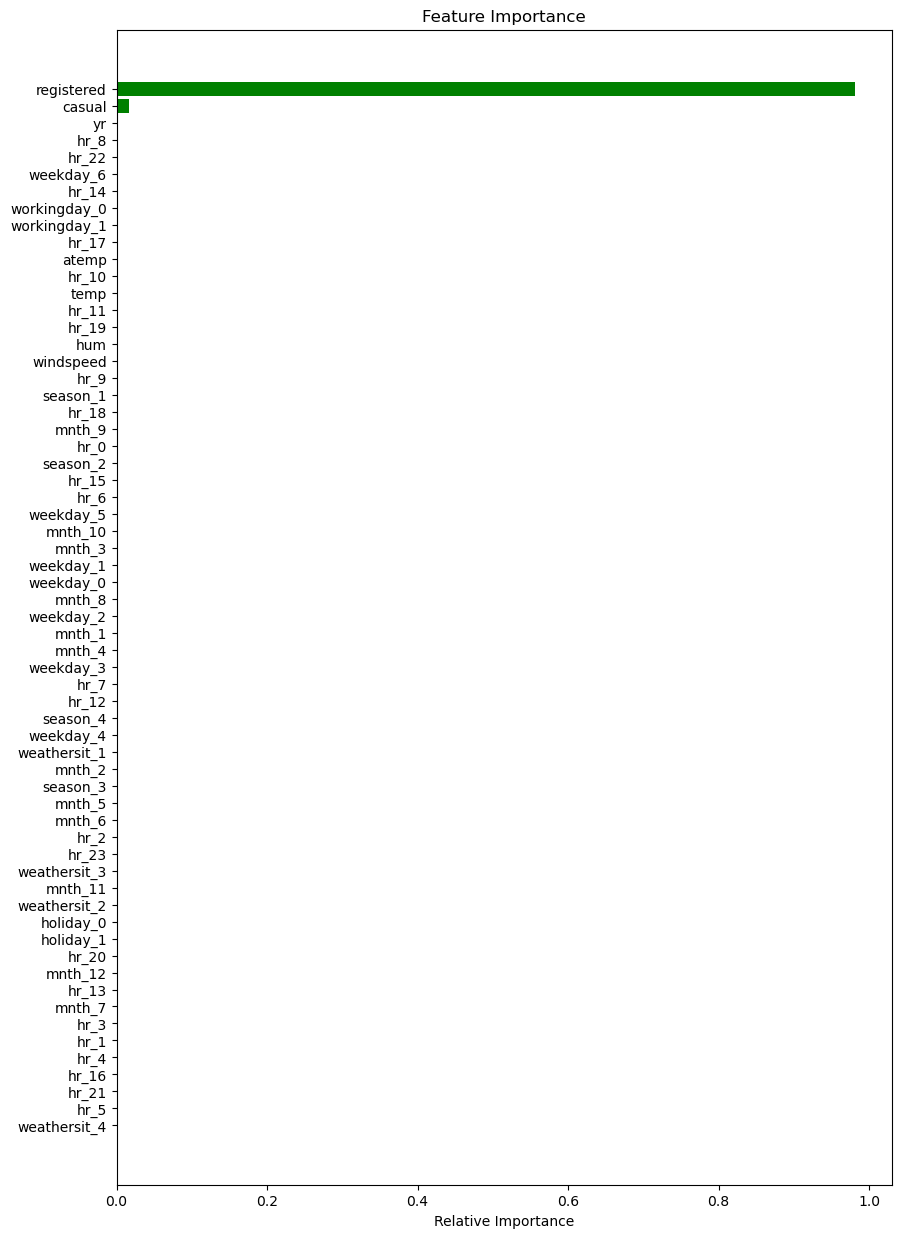

In [79]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)),imp[indices],align = 'center',color='Green')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Decision Tree Regressor

In [80]:
d_model = DecisionTreeRegressor()
d_model.fit(X_train,y_train)
d_y_pred = d_model.predict(X_test)

### Error Difference

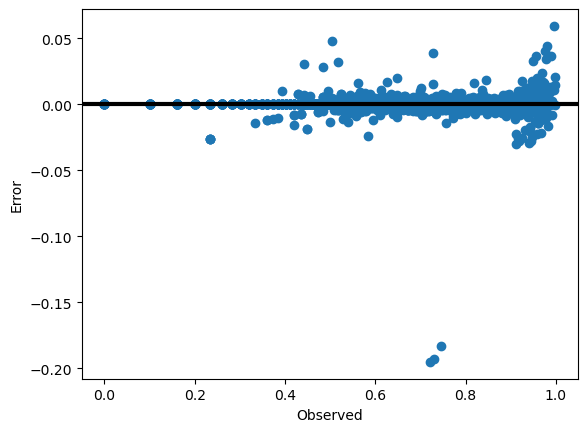

In [81]:
error = y_test - d_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [82]:
mean_squared_error(y_test,d_y_pred)

4.841909286914967e-05

In [83]:
np.sqrt(mean_squared_error(y_test,d_y_pred))

0.006958382920560615

In [84]:
mean_absolute_error(y_test,d_y_pred)

0.0019981493040683424

In [85]:
r2_score(y_test,d_y_pred)

0.9989350730525531

In [86]:
d_model.feature_importances_

array([8.85154934e-05, 1.67056949e-02, 1.32153668e-07, 5.62535296e-05,
       1.65439942e-07, 2.65380341e-07, 7.27070735e-05, 4.52400062e-05,
       3.18738637e-07, 2.85164325e-07, 8.35065868e-05, 1.81439045e-07,
       5.40859377e-07, 1.10798461e-04, 7.94286737e-06, 3.53363549e-05,
       1.56582647e-07, 7.38607619e-08, 8.31384077e-08, 8.41278748e-05,
       7.84669421e-08, 8.45583763e-07, 0.00000000e+00, 0.00000000e+00,
       2.08445614e-07, 5.98517664e-07, 1.41665218e-04, 8.58188578e-05,
       1.98133609e-05, 1.59473407e-07, 7.19579538e-06, 8.00268170e-07,
       1.37839944e-06, 1.93849537e-06, 8.94684673e-06, 7.77052554e-07,
       2.54569627e-06, 1.37233950e-06, 1.05442378e-06, 3.03511607e-06,
       1.16752288e-05, 9.81050572e-01, 1.78307120e-05, 1.32458354e-05,
       1.36260990e-06, 1.10622531e-06, 5.98909793e-05, 1.18923098e-06,
       2.05414286e-06, 3.15882240e-06, 0.00000000e+00, 7.97988854e-07,
       1.53688444e-06, 6.05197090e-05, 2.16406701e-06, 8.83172365e-07,
      

In [87]:
d_imp = d_model.feature_importances_
d_indices = np.argsort(d_imp)
features =X_train.columns

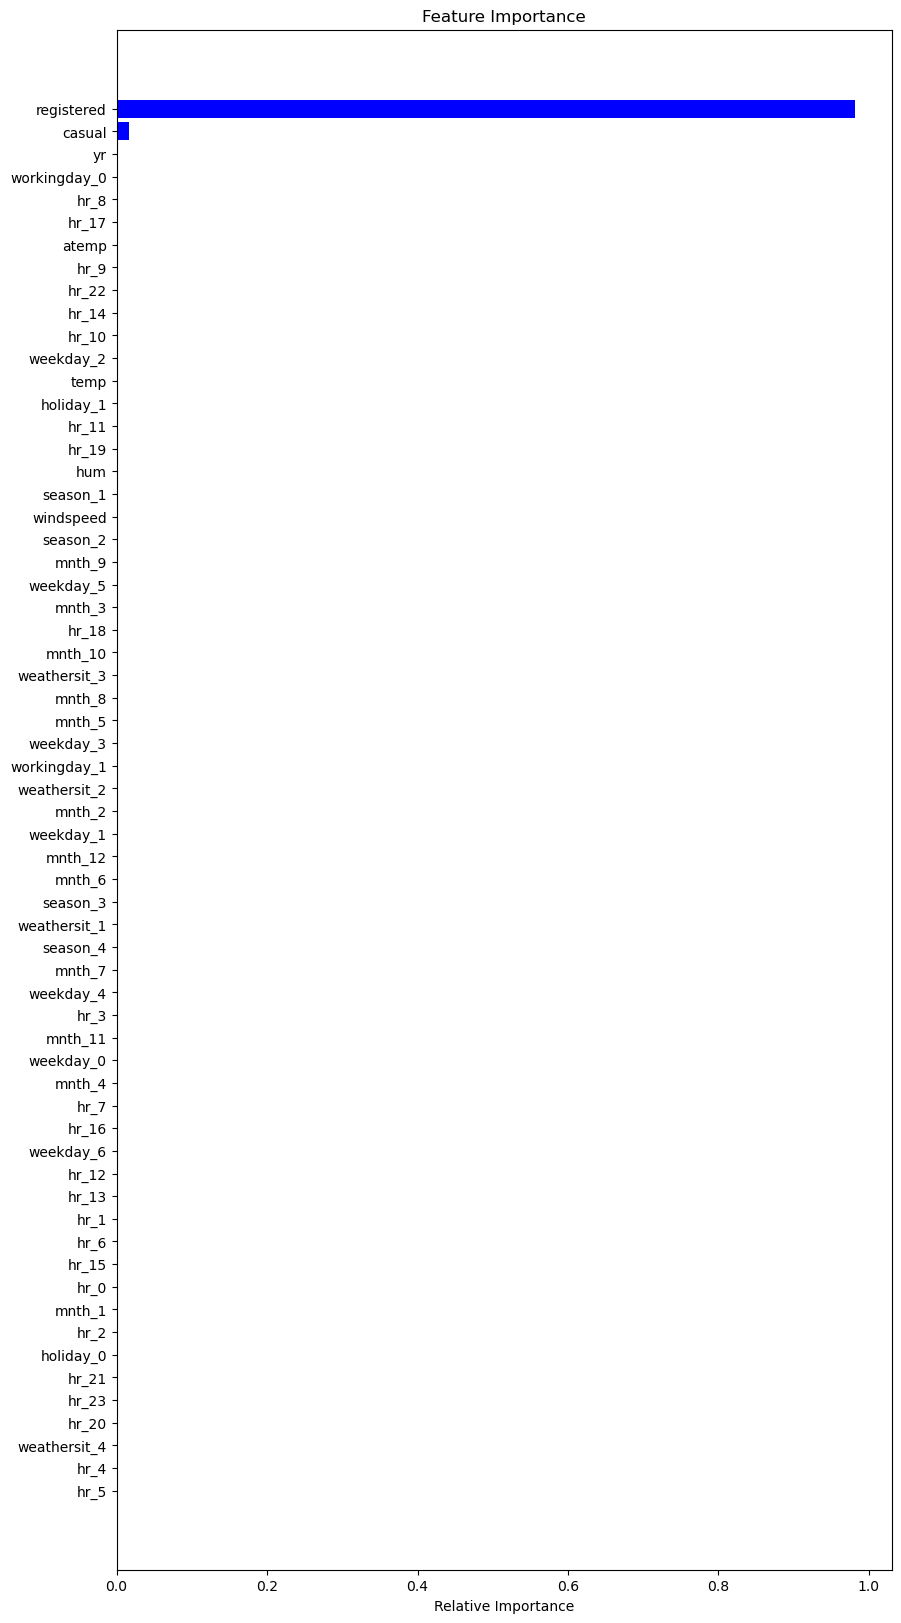

In [88]:
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(d_indices)),d_imp[d_indices],color='blue',align = 'center')
plt.yticks(range(len(d_indices)),[features[i] for i in d_indices])
plt.xlabel('Relative Importance')
plt.show()

# Extra Trees Regressor

In [89]:
e_model = ExtraTreesRegressor()
e_model.fit(X_train,y_train)
e_y_pred = e_model.predict(X_test)

### Error Difference

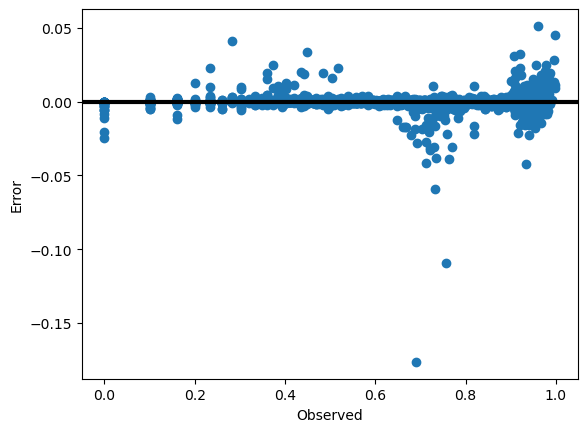

In [90]:
error = y_test - e_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [91]:
mean_squared_error(y_test,e_y_pred)

2.8532804306263237e-05

In [92]:
np.sqrt(mean_squared_error(y_test,e_y_pred))

0.005341610647198393

In [93]:
mean_absolute_error(y_test,e_y_pred)

0.0014079777461528725

In [94]:
r2_score(y_test,e_y_pred)

0.9993724510231102

# Gradient Boosting Regressor

In [95]:
g_model = GradientBoostingRegressor()
g_model.fit(X_train,y_train)
g_y_pred = g_model.predict(X_test)

### Error Difference

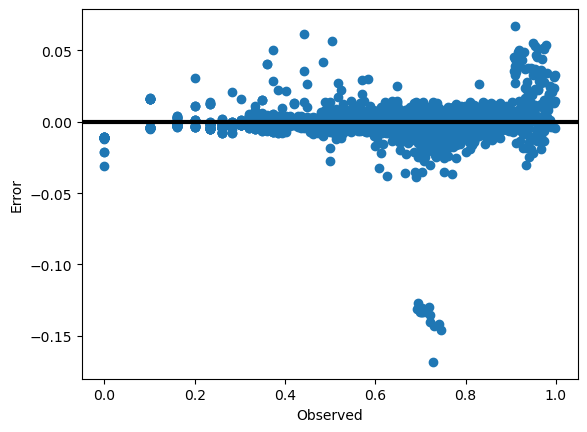

In [96]:
error = y_test - g_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [97]:
mean_squared_error(y_test,g_y_pred)

0.00015249494136028248

In [98]:
np.sqrt(mean_squared_error(y_test,g_y_pred))

0.012348884215194606

In [99]:
mean_absolute_error(y_test,g_y_pred)

0.005630812886584563

In [100]:
r2_score(y_test,g_y_pred)

0.9966460343888978

# SVR

In [101]:
s_model = SVR()
s_model.fit(X_train,y_train)
s_y_pred = s_model.predict(X_test)

### Error Difference

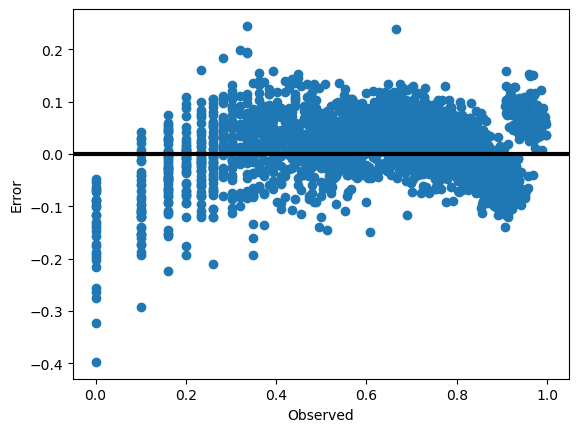

In [102]:
error = y_test - s_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [103]:
mean_squared_error(y_test,s_y_pred)

0.003255042276478695

In [104]:
np.sqrt(mean_squared_error(y_test,s_y_pred))

0.05705297780553347

In [105]:
mean_absolute_error(y_test,s_y_pred)

0.04483663185101522

In [106]:
r2_score(y_test,s_y_pred)

0.9284087736903989

# Elastic Net CV

In [107]:
ela_model = ElasticNetCV()
ela_model.fit(X_train,y_train)
ela_y_pred = ela_model.predict(X_test)

### Error Difference

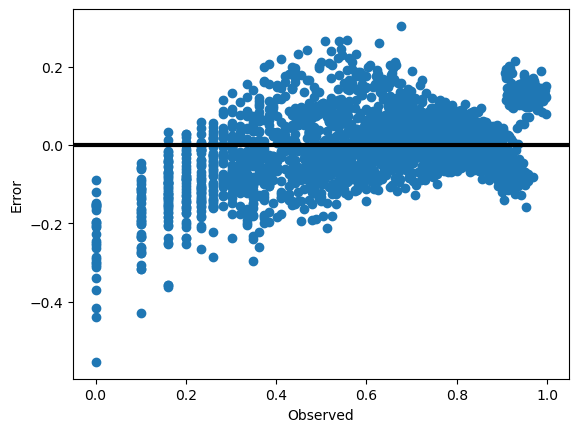

In [108]:
error = y_test - ela_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [109]:
mean_squared_error(y_test,ela_y_pred)

0.006211028035861816

In [110]:
np.sqrt(mean_squared_error(y_test,ela_y_pred))

0.07881007572551758

In [111]:
mean_absolute_error(y_test,ela_y_pred)

0.05601682511710693

In [112]:
r2_score(y_test,ela_y_pred)

0.8633949804757409

# Linear Regression

In [113]:
l_model = LinearRegression()
l_model.fit(X_train,y_train)
l_y_pred = l_model.predict(X_test)

### Error Difference

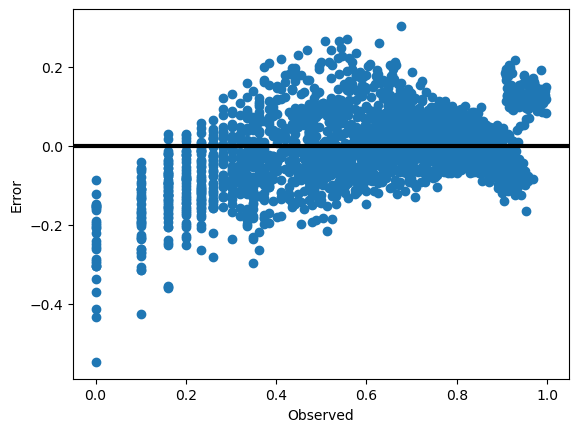

In [114]:
error = y_test - l_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [115]:
mean_squared_error(y_test,l_y_pred)

0.006226705957966501

In [116]:
np.sqrt(mean_squared_error(y_test,l_y_pred))

0.07890947951904449

In [117]:
mean_absolute_error(y_test,l_y_pred)

0.05621699247946477

In [118]:
r2_score(y_test,l_y_pred)

0.8630501610927266

# Ridge

In [119]:
rid_model = Ridge()
rid_model.fit(X_train,y_train)
rid_y_pred = rid_model.predict(X_test)

### Error Difference

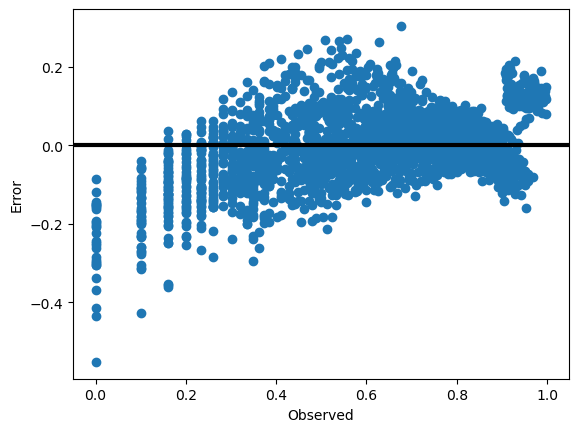

In [120]:
error = y_test - rid_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [121]:
mean_squared_error(y_test,rid_y_pred)

0.006206999569319957

In [122]:
np.sqrt(mean_squared_error(y_test,rid_y_pred))

0.07878451351198379

In [123]:
mean_absolute_error(y_test,rid_y_pred)

0.0560436439231351

In [124]:
r2_score(y_test,rid_y_pred)

0.8634835823541137

# Huber Regressor

In [125]:
h_model = HuberRegressor()
h_model.fit(X_train,y_train)
h_y_pred = h_model.predict(X_test)

### Error Difference

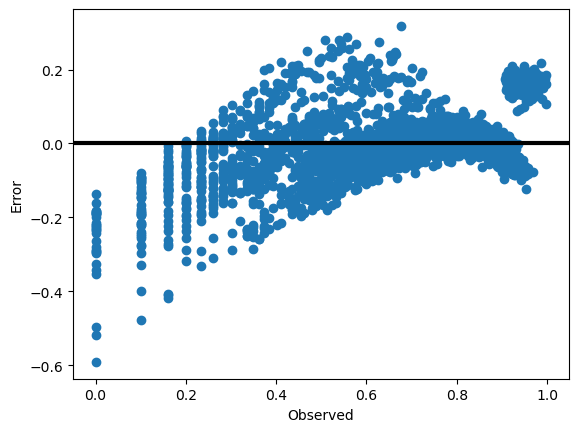

In [126]:
error = y_test - h_y_pred
fig,ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3,color = 'black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [127]:
mean_squared_error(y_test,h_y_pred)

0.006598242760612937

In [128]:
np.sqrt(mean_squared_error(y_test,h_y_pred))

0.08122956826558256

In [129]:
mean_absolute_error(y_test,h_y_pred)

0.052295956086206095

In [130]:
r2_score(y_test,h_y_pred)

0.8548786004611452

## Models Evaluation Table

|S.No| Algorithms | Absolute CV Score | MSE | RMSE | MAE | r2_score|
|----|------------|-------------------|-----|------|-----|---------|
|1|Random Forest Regressor |6.61e-05|3.12e-05    |  0.0055     |  0.0011  |  0.9993    |
|2|Decision Tree Regressor|0.0001|  6.60e-05  |  0.0081     |  0.0020   | 0.9986     |
|3|Extra Tree Regressor|  7.66e-05        |  6.04e-05     | 0.0077      | 0.0015    | 0.9987     |
|4|Gradient Boosting Regressor|0.0001       | 0.0001    | 0.0113     | 0.0058    | 0.9972      |
|5|SVR|   0.0040                           | 0.0032     |0.0570      | 0.0447    | 0.9309      |
|6|Elastic Net CV| 0.0069                 | 0.0063      |  0.0795    |  0.0572   |  0.8660     |
|7|Linear Regression| 0.0069        |0.0063         | 0.0795     |  0.0574    | 0.8658     |
|8|Ridge|         0.0069            |0.0063     |0.0795        |0.0572      |0.8659|
|9|Huber Regressor|   0.0077       |0.0067     |  0.0821        |   0.0536        |0.8571       |


# Data Analysis Report

I completed this job using the steps listed below.

#### 1. Information of the dataset.
#### 2. Objective of the dataset.
#### 3. Attribute Information.
#### 4. Import Modules.
#### 5. Loading the dataset.
#### 6. Descriptive Analysis
#### 7. Preprpcessing the dataset
    (a) Check the null values
    (b) Drop unnecessary columns
    (c) Check correlation
#### 8. Exploratory Data Analysis
   In this we use:
  
        (a) pointplot
        (b) barplot
        (c) regplot
         And given inferences about each plot for the dataset.
    
#### 9. Normality Test
   In this we use:
   
        (a) qqplot
        (b) distplot
#### 10. Crrelation Matrix
   In this we use Heatmap and given inferences for the dataset.
#### 11. Outlier Handling
      By using IQR method we detect outliers and solve them. 
#### 12. Encoding
    In this we use One-Hot Encoding.
#### 13. Scaling
    In this we use MinmaxScalar.
#### 14. Split Data
    We split 80% of data for training and 20% of data for testing.
#### 15. Model Training
    Models Used : LinearRegression, Ridge, HuberRegressor, ElasticNetCV, DecisionTreeRegressor, RandomForestRegressor,
                  GradientBoostingRegressor, ExtraTreesRegressor, SVR.
            
    We see absolute CV scores of the each model. Which model have the least absolute CV score that is the best model 
    and that is Random Forest Regressor.
    We also seen Feature Importance.
#### 16. Model Evaluation
    In this we evaluate MSE, RMSE, MAE and r2_score of each model.
#### 17. Model Evaluation Table.
     In this MSE     : Mean Square Error
             RMSE    : Root Mean Square Error
             MAE     : Mean Absolute Error
             CV Score: Cross Validation Score
             

## Model Comparision Report

#####  Based on model evaluation Random Forest Regressor have the best and highest r2_score.
#####  Extra Trees Regressor algorithm can be considered as second most good model.

### Challenges Faced

Certain challenges faced to uderstand the data factors. And then I undestood.

# Conclusion and Future Work

Finally we can predict that the attributes registered and casual variables are the factors that influence the most of the
bike sharing count data set using which we know their prominence. We can also state that the use of Random Forest for this
kind of data set is the best way to accurately predict the influence of which attributes are more and which are less. Similarly
if you consider the method where we use the data set, we can conclude that the training data set is always the best data set.
Where as we find MSE, RMSE, MAE and r2 score whereas in all the means we consider mean of the MAE as the factor to analyze the 
Random Forest Regression Model.

For the large data sets, the implementation of the Random Forest Regression using sklearn will slow down the process which
is due to the more computation cost and also because the storage of the data in the main memory can not be completely stored.
In certain scenarios this sklearn leads to the worst implementation that crashes and thus not advised for large data sets.

There are many other alternatives for this problem, but the best one will be the python woodly implementation in which we use
the top tree pre classification and that also distributes the samples to the bottom of the Random Forsts That are implemented
using C and this is also a highly optimised solution. We can use other machine learning frameworks such as Apache Spark ML for
highly optimised distributed computation which will help in the utilization of computer clustring. This Spark ML can run Kubernetes,
Apache Mesos, Hadloop etc, which will access the data from various popular Apache databases such as Apache Cassandra which is 
100 times faster than any classic algorithms.

To improve the performance of the model, we adjust the distribution of the target variable that is, if we see some of the predictive
models, they assume the normal distribution of the target variable which can be improved by simply implementing a transformation
in the data pre-processing which further improves the performance of the such methods.